# Práctica 8a: clasificación con knn

K-Nearest Neighbors es un modelo computacional no lineal que funciona a partir de un objeto no clasificado y luego contando cuántos vecinos pertenecen a cada categoría. Si más vecinos pertenecen a la categoría A que a la categoría B, entonces el nuevo punto debería pertenecer a la categoría A. Por lo tanto, la clasificación de un cierto punto se basa en la mayoría de sus vecinos más cercanos (de ahí el nombre).

In [1]:
#Importamos librerías
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

In [2]:
#IMPORTAMOS DATASET
file = "covid_mx.csv"
df = pd.read_csv(file,encoding ='latin', error_bad_lines=False)
df.head()

,N° Caso,Estado,Sexo,Edad,Fecha de Inicio de síntomas,Identificación de COVID-19 por RT-PCR\nen tiempo real
0,1,TAMAULIPAS,MASCULINO,22,04/04/2020,Confirmado
1,2,CIUDAD DE MÉXICO,MASCULINO,40,17/03/2020,Confirmado
2,3,CIUDAD DE MÉXICO,FEMENINO,29,26/03/2020,Confirmado
3,4,MÉXICO,FEMENINO,84,26/03/2020,Confirmado
4,5,NUEVO LEÓN,MASCULINO,54,20/03/2020,Confirmado


In [3]:
df.rename(columns={'Identificación de COVID-19 por RT-PCR\nen tiempo real':
                   'diagnostico',
                        },
               inplace=True)
df.columns

Index(['N° Caso', 'Estado', 'Sexo', 'Edad', 'Fecha de Inicio de síntomas',
       'diagnostico'],
      dtype='object')

In [4]:
df.Sexo = df.Sexo.replace({"MASCULINO": 1, "FEMENINO": 2})

In [6]:
df.diagnostico = df.diagnostico.replace({"Confirmado": 1, "Sospechoso": 2})

In [7]:
df["Sexo"].unique()

array([1, 2], dtype=int64)

In [8]:
df["diagnostico"].unique()

array([1, 2], dtype=int64)

In [9]:
X = df.iloc[:, [2,3]].values
y = df.iloc[:, 5].values

In [10]:
#Dividimos nuestros datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
#Escalamos características
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [12]:
# Visualizando los resultados del conjunto de prueba
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
# Predecimo los valores del testeo
y_pred = classifier.predict(X_test)

In [14]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7086028460543338


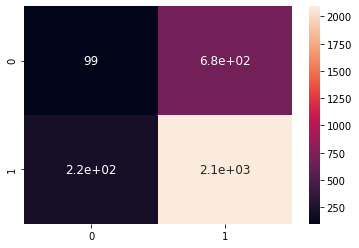

In [15]:
# Hacemos la matriz de confusion
from sklearn.metrics import confusion_matrix 
import seaborn as sn
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sn.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size

In [ ]:
# Visualizamos los resultados del entrenamiento
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j) 
    
plt.title('K-NN (Train)')
plt.xlabel('Edad')
plt.ylabel('Diagnostico estimado')
plt.legend()
plt.show()

In [ ]:
# Visualizamos el resultado del testeo
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('K-NN (Test)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()